In [4]:
import nibabel as nib
import skimage.io as io
import numpy as np
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)
from dipy.viz import regtools

In [7]:
img_in = nib.load('e:/flirt_out/t1w_brain_nores.nii.gz')
img_ref = nib.load('e:/flirt_out/nodif_B0.nii.gz')
img_out = nib.load('e:/flirt_out/t1w_in_dwi.nii.gz')
omat = np.loadtxt('e:/flirt_out/t1wtissue2dwi_xfm.mat')
init_omat = np.loadtxt('e:/flirt_out/t1w2dwi_bbr_xfm.mat')

print(img_in.affine)
print(img_in.shape)
print('--'*30)
print(img_ref.affine)
print(img_ref.shape)
print('--'*30)
print(img_out.affine)
print(img_out.shape)
print('--'*30)
print(omat)
print(omat.shape)
print('--'*30)
print(init_omat)
print(init_omat.shape)

[[   2.           -0.           -0.          -88.9927063 ]
 [  -0.            2.           -0.         -112.91127014]
 [   0.            0.            2.         -122.95181274]
 [   0.            0.            0.            1.        ]]
(96, 128, 128)
------------------------------------------------------------
[[   2.            0.            0.         -138.796875  ]
 [   0.            2.            0.         -111.13427734]
 [   0.            0.            2.          -50.23252869]
 [   0.            0.            0.            1.        ]]
(141, 141, 68)
------------------------------------------------------------
[[   2.            0.            0.         -138.796875  ]
 [   0.            2.            0.         -111.13427734]
 [   0.            0.            2.          -50.23252869]
 [   0.            0.            0.            1.        ]]
(141, 141, 68)
------------------------------------------------------------
[[ 1.01030130e+00  5.32921542e-02  1.87642153e-03  3.90175170

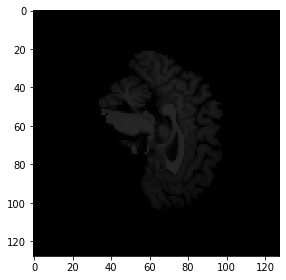

In [8]:
# show the image in
img_in_arr = img_in.get_data()
io.imshow(img_in_arr[46])

D:\program file\jupyterlab\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


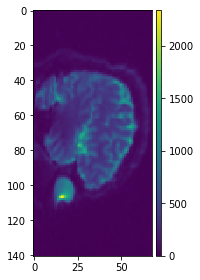

In [9]:
# show the image ref
img_ref_arr = img_ref.get_data()
io.imshow(img_ref_arr[46])

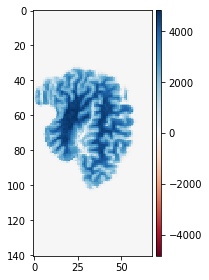

In [10]:
# show the image ref
img_out_arr = img_out.get_data()
io.imshow(img_out_arr[46])

(96, 128, 128)
(141, 141, 68)
[[   2.           -0.           -0.          -88.9927063 ]
 [  -0.            2.           -0.         -112.91127014]
 [   0.            0.            2.         -122.95181274]
 [   0.            0.            0.            1.        ]]
------------------------------------------------------------
(141, 141, 68)
(141, 141, 68)


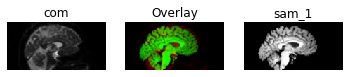

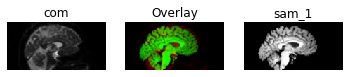

In [11]:
identity = np.eye(4)
print(img_in_arr.shape)
print(img_ref.shape)
print(img_in.affine)
print('--'*30)
affine_map = AffineMap(identity,
                       img_ref_arr.shape, img_ref.affine,
                       img_in_arr.shape, img_in.affine)
sam_1 = affine_map.transform(img_in_arr)
print(sam_1.shape)
print(img_ref.shape)
regtools.overlay_slices(img_ref_arr, sam_1, None, 0,
                        "com", "sam_1")

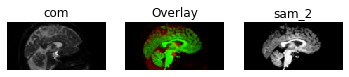

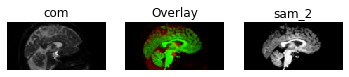

In [12]:
c_of_mass = transform_centers_of_mass(img_ref_arr, img_ref.affine,
                                      img_in_arr, img_in.affine)
sam_2 = c_of_mass.transform(img_in_arr)
regtools.overlay_slices(img_ref_arr, sam_2, None, 0,
                        "com", "sam_2")

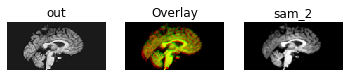

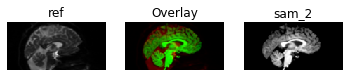

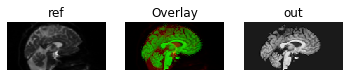

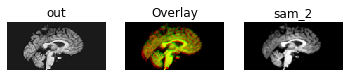

In [14]:
# compare of sam_2-ref, out-ref and sam_2-out
regtools.overlay_slices(img_ref_arr, sam_2, None, 0,
                        "ref", "sam_2")
regtools.overlay_slices(img_ref_arr, img_out_arr, None, 0,
                        "ref", "out")
regtools.overlay_slices(img_out_arr, sam_2, None, 0,
                        "out", "sam_2")

In [15]:
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

level_iters = [10000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]
affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)
transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
print(starting_affine)
translation = affreg.optimize(img_ref_arr, img_in_arr, transform, params0,
                              img_ref.affine, img_in.affine,
                              starting_affine=starting_affine)

[[ 1.          0.          0.          7.43769314]
 [ 0.          1.          0.         -8.82208759]
 [ 0.          0.          1.         -4.19456696]
 [ 0.          0.          0.          1.        ]]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


------translation via dipy---------
[[ 1.          0.          0.          6.53766884]
 [ 0.          1.          0.         -6.4691209 ]
 [ 0.          0.          1.         -1.53535642]
 [ 0.          0.          0.          1.        ]]
------translation via FAST---------
[[ 1.01030130e+00  5.32921542e-02  1.87642153e-03  3.90175170e+01]
 [-5.32649674e-02  1.01022677e+00 -1.25259237e-02  9.39017734e+00]
 [-2.53348422e-03  1.24097244e-02  1.01162836e+00 -7.46153728e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
------init omat---------
[[ 9.92643465e-01  5.26786522e-02  7.33057837e-03  3.97712953e+01]
 [-5.25964434e-02  9.92614678e-01 -1.09263484e-02  1.06405370e+01]
 [-7.89888730e-03  1.05228377e-02  9.93980222e-01 -7.14424464e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


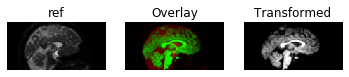

In [21]:
transformed = translation.transform(img_in_arr)
regtools.overlay_slices(img_ref_arr, transformed, None, 0,
                        "ref", "Transformed")
print('------translation via dipy---------')
print(translation.affine)
print('------translation via FAST---------')
print(omat)
print('------init omat---------')
print(init_omat)